<a href="https://colab.research.google.com/github/awalinrizky/praktikum5/blob/main/Praktikum5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [7]:
df = pd.read_csv('/content/drive/MyDrive/praktikum_ml/praktikum03/data/stunting_wasting_dataset.csv')
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis Kelamin      100000 non-null  object 
 1   Umur (bulan)       100000 non-null  int64  
 2   Tinggi Badan (cm)  100000 non-null  float64
 3   Berat Badan (kg)   100000 non-null  float64
 4   Stunting           100000 non-null  object 
 5   Wasting            100000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB


In [9]:
# Cek missing value
df.isnull().sum()

,0
Jenis Kelamin,0
Umur (bulan),0
Tinggi Badan (cm),0
Berat Badan (kg),0
Stunting,0
Wasting,0


In [10]:
# Cek duplicate
df.duplicated().sum()

np.int64(7308)

In [11]:
# Menghapus data duplikat
df = df.drop_duplicates()

# Cek duplicate ulang setelah menghapus
df.duplicated().sum()

np.int64(0)

In [12]:
df = df.rename(columns={
    'Jenis Kelamin':'jenis_kelamin',
    'Umur (bulan)':'umur_bulan',
    'Tinggi Badan (cm)':'tinggi_cm',
    'Berat Badan (kg)':'berat_kg',
    'Stunting':'stunting',
    'Wasting':'wasting'
})

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92692 entries, 0 to 99997
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   jenis_kelamin  92692 non-null  object 
 1   umur_bulan     92692 non-null  int64  
 2   tinggi_cm      92692 non-null  float64
 3   berat_kg       92692 non-null  float64
 4   stunting       92692 non-null  object 
 5   wasting        92692 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 5.0+ MB


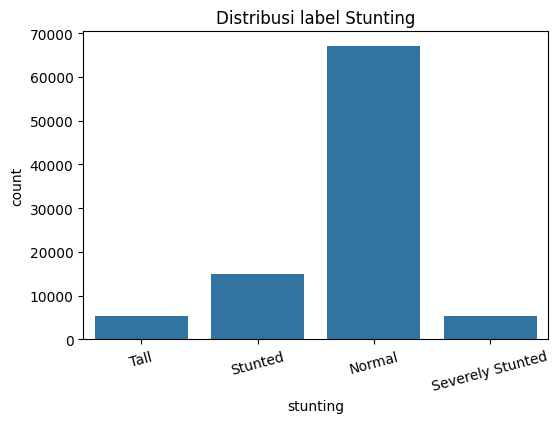

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x='stunting', data=df)
plt.title('Distribusi label Stunting')
plt.xticks(rotation=15)
plt.show()

In [20]:
# mapping label -> kode untuk target
stunting_cat = df['stunting'].astype('category')
stunting_classes = list(stunting_cat.cat.categories) # urutan kelas
df['stunting'] = stunting_cat.cat.codes               # y numerik

# fitur kategorikal lain (jenis_kelamin, wasting) -> kode juga
for col in ['jenis_kelamin', 'wasting']:
  if col in df.columns:
    df[col] = df[col].astype('category').cat.codes

df.head()

,jenis_kelamin,umur_bulan,tinggi_cm,berat_kg,stunting,wasting
0,0,19,91.6,13.3,3,1
1,0,20,77.7,8.5,2,3
2,0,10,79.0,10.3,0,1
3,1,2,50.3,8.3,1,1
4,1,5,56.4,10.9,1,1


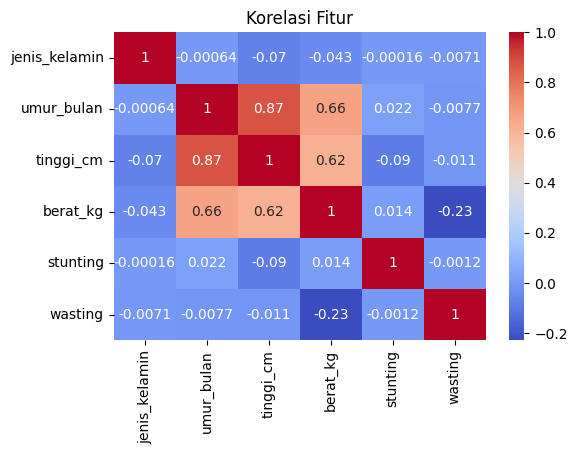

In [23]:
# Korelasi
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur')
plt.show()

## **Memilih fitur dan target**

In [24]:
# Memilih fitur dan target
feature_cols = ['umur_bulan', 'tinggi_cm', 'berat_kg', 'wasting']
X = df[feature_cols]
y = df['stunting']

In [25]:
# Membagi dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
len(X_train), len(X_test)

(74153, 18539)

In [30]:
# Membangun model
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=42
)

dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [32]:
# Evaluasi
y_pred = dt.predict(X_test)

print("Akurasi:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(
    y_test, y_pred, target_names=[str(cls) for cls in stunting_classes]
))

Akurasi: 77.67 %

Confusion Matrix:
 [[12901     0   481    29]
 [  587    25   455     0]
 [ 1653     0  1355     0]
 [  935     0     0   118]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.96      0.88     13411
           1       1.00      0.02      0.05      1067
           2       0.59      0.45      0.51      3008
           3       0.80      0.11      0.20      1053

    accuracy                           0.78     18539
   macro avg       0.80      0.39      0.41     18539
weighted avg       0.78      0.78      0.73     18539



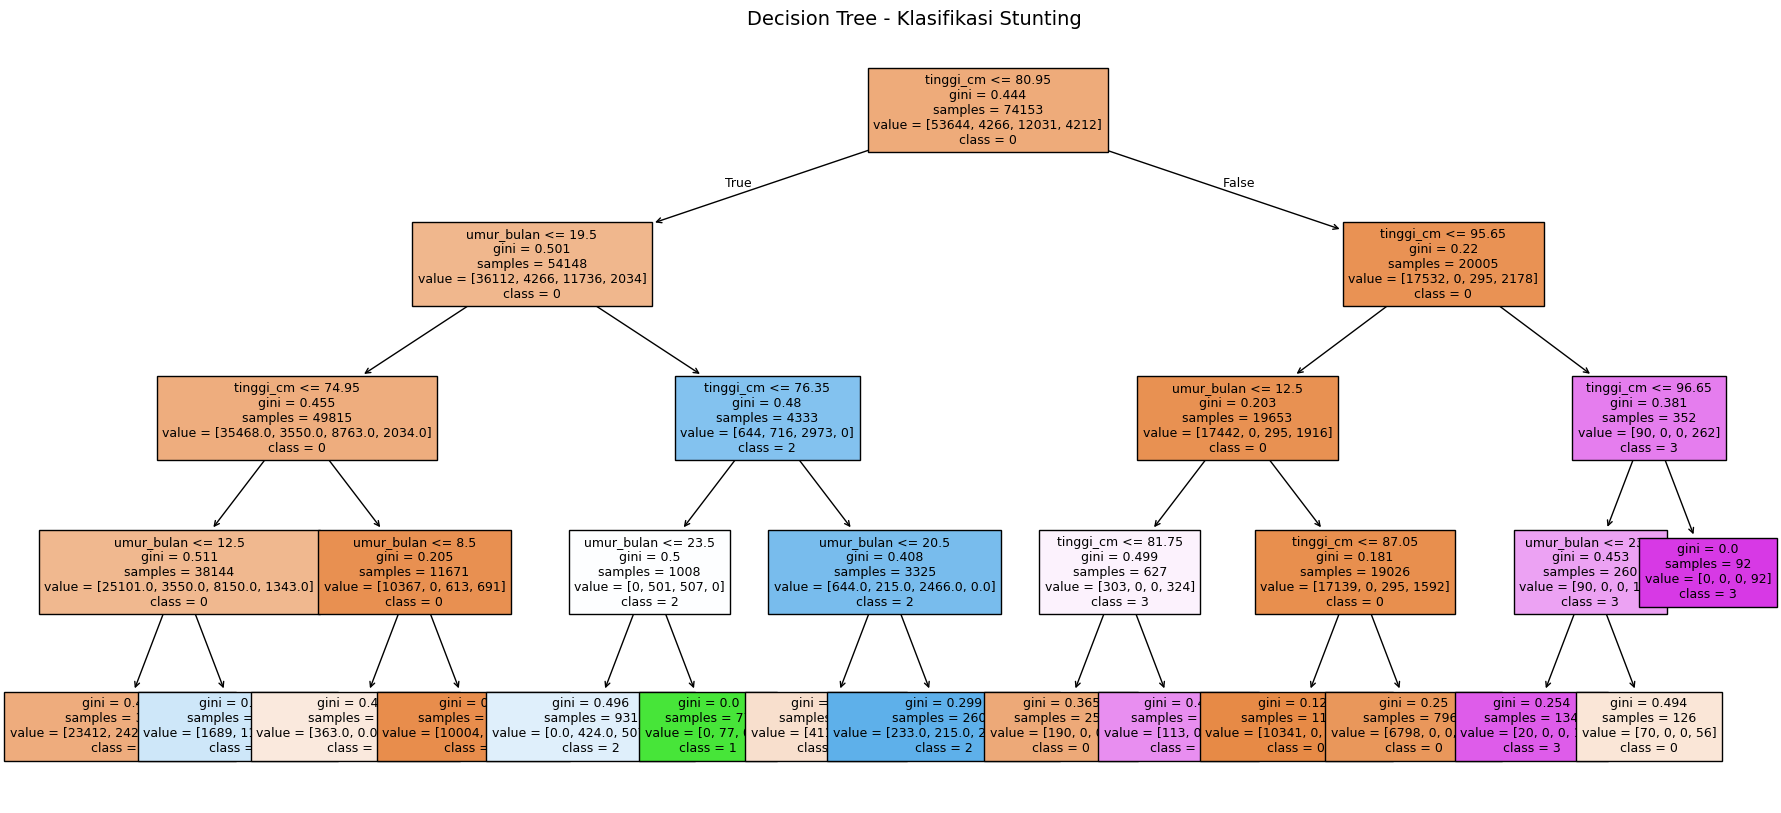


Tabel Interpretasi Model Decision Tree:



,Pola,Kategori Dominan,Makna
0,Tinggi < 75 cm,Normal / Stunted,Mungkin rawan stunting
1,Tinggi sekitar 75 cm,Stunted,Jenis stunting
2,Tinggi > 95 cm,Tall,Pertumbuhan di atas rata-rata
3,Umur < 12 bulan,Normal,Mayoritas masih sesuai usia
4,Umur > 20 bulan tapi tinggi rendah,Stunted,Perkembangan fisik tertinggal


In [36]:
# Visualisasi Model Decision Tree
plt.figure(figsize=(22, 10))
plot_tree(
    dt,                                                     # model decision tree yang sudah dilatih
    feature_names=feature_cols,                             # nama-nama fitur
    class_names=[str(cls) for cls in stunting_classes],     # nama kelas asli (misalnya: "Normal", "Stunting Ringan", "Stunting Berat")
    filled=True,                                            # memberi warna berdasarkan kelas
    fontsize=9                                              # ukuran font pada diagram
)
plt.title("Decision Tree - Klasifikasi Stunting", fontsize=14)
plt.show()

# Tabel Interpretasi Hasil Model
data_interpretasi = {
    "Pola": [
        "Tinggi < 75 cm",
        "Tinggi sekitar 75 cm",
        "Tinggi > 95 cm",
        "Umur < 12 bulan",
        "Umur > 20 bulan tapi tinggi rendah"
    ],
    "Kategori Dominan": [
        "Normal / Stunted",
        "Stunted",
        "Tall",
        "Normal",
        "Stunted"
    ],
    "Makna": [
        "Mungkin rawan stunting",
        "Jenis stunting",
        "Pertumbuhan di atas rata-rata",
        "Mayoritas masih sesuai usia",
        "Perkembangan fisik tertinggal"
    ]
}

interpretasi_df = pd.DataFrame(data_interpretasi)

print("\nTabel Interpretasi Model Decision Tree:\n")
display(interpretasi_df)

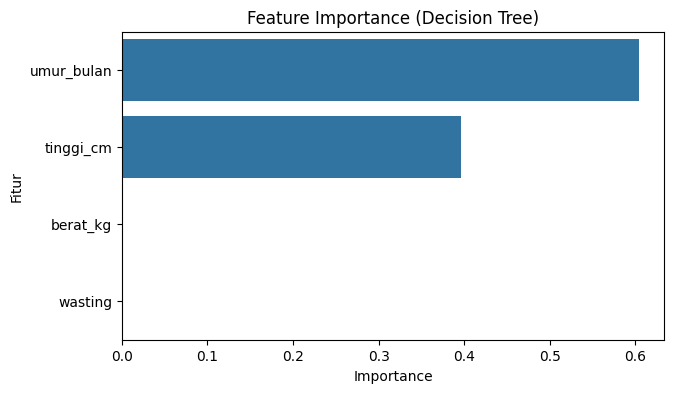

,0
umur_bulan,0.603752
tinggi_cm,0.396248
berat_kg,0.000000
wasting,0.000000


In [37]:
# Fitur yang penting
imp = pd.Series(dt.feature_importances_, index=feature_cols).sort_values(ascending=False)

plt.figure(figsize=(7, 4))
sns.barplot(x=imp, y=imp.index)
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Fitur")
plt.show()

# Menampilkan nilai importance di tabel
imp

In [38]:
scores = {}
for d in range(2, nine := 9):  # tampaknya ada kesalahan penulisan di gambar
    m = DecisionTreeClassifier(max_depth=d, random_state=42)
    m.fit(X_train, y_train)
    scores[d] = accuracy_score(y_test, m.predict(X_test))

scores
best_d = max(scores, key=scores.get)
print("Best max_depth:", best_d, "| Acc:", round(scores[best_d]*100, 2), "%")

Best max_depth: 8 | Acc: 84.22 %
